In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 73189716.55it/s]


Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 50284638.37it/s]


Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21674950.24it/s]


Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12172861.83it/s]


Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [11]:
image, label = train_data[0]

In [12]:
image.shape

torch.Size([1, 28, 28])

In [13]:
label

5

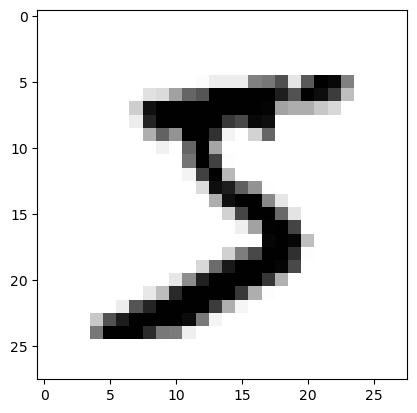

In [14]:
plt.imshow(image.reshape((28, 28)), cmap='gist_yarg') #viridis

In [15]:
torch.manual_seed(101)

# 0 images, 1 images, ...
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [16]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # Formatting

In [17]:
# First batch
for images, labels in train_loader:
    # 60,000 / 100    60 times
    break

In [18]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [19]:
images.shape

torch.Size([100, 1, 28, 28])

In [20]:
labels.shape

torch.Size([100])

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


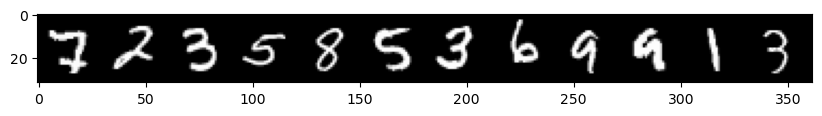

In [21]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12) # the default nrow is 8
plt.figure(figsize=(10, 4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [22]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1) # Multi Class Classification

In [23]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
# ANN ---> CNN
for param in model.parameters():
   print(param.numel())

94080
120
10080
84
840
10


In [25]:
# 105,214 total parameters

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
images.shape # -----> [100, 784]

torch.Size([100, 1, 28, 28])

In [28]:
images.view(100, -1).shape

torch.Size([100, 784])

In [29]:
import time
start_time = time.time()
epochs = 10

# Trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1

        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1] #print(y_pred.data)
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:
            acc = trn_corr.item()*100/(100*b)
            print(f'Epoch {i} - Batch {b} - Loss {loss.item()} - Accuracy: {acc}')

    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500, -1))

            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted==y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0 - Batch 200 - Loss 0.23541302978992462 - Accuracy: 83.25
Epoch 0 - Batch 400 - Loss 0.3537280559539795 - Accuracy: 87.5275
Epoch 0 - Batch 600 - Loss 0.13648736476898193 - Accuracy: 89.57333333333334
Epoch 1 - Batch 200 - Loss 0.2446790337562561 - Accuracy: 94.805
Epoch 1 - Batch 400 - Loss 0.14542996883392334 - Accuracy: 95.0625
Epoch 1 - Batch 600 - Loss 0.07299502193927765 - Accuracy: 95.35666666666667
Epoch 2 - Batch 200 - Loss 0.08716949820518494 - Accuracy: 96.5
Epoch 2 - Batch 400 - Loss 0.06698200106620789 - Accuracy: 96.595
Epoch 2 - Batch 600 - Loss 0.06888753175735474 - Accuracy: 96.67833333333333
Epoch 3 - Batch 200 - Loss 0.11644275486469269 - Accuracy: 97.665
Epoch 3 - Batch 400 - Loss 0.05814240872859955 - Accuracy: 97.485
Epoch 3 - Batch 600 - Loss 0.03187057375907898 - Accuracy: 97.49666666666667
Epoch 4 - Batch 200 - Loss 0.11700139939785004 - Accuracy: 98.12
Epoch 4 - Batch 400 - Loss 0.046672023832798004 - Accuracy: 97.9775
Epoch 4 - Batch 600 - Loss 0.05095

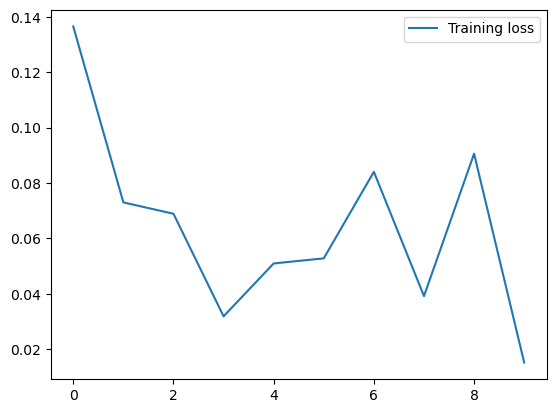

In [30]:
plt.plot(train_losses, label='Training loss')
plt.legend()

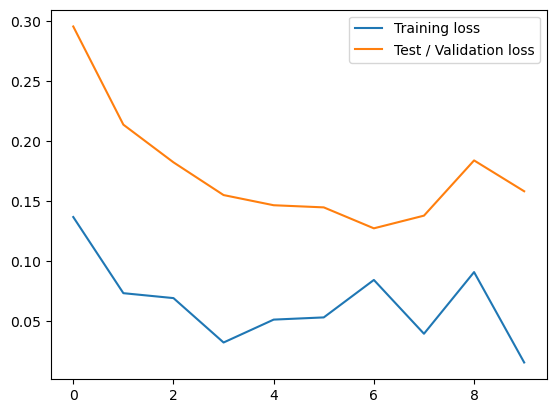

In [31]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test / Validation loss')
plt.legend()

In [32]:
train_acc = [t/600 for t in train_correct]

In [33]:
train_acc

[89.57333333333334,
 95.35666666666667,
 96.67833333333333,
 97.49666666666667,
 97.99666666666667,
 98.43166666666667,
 98.71,
 98.975,
 99.12666666666667,
 99.29666666666667]

In [34]:
test_acc = [t/100 for t in test_correct]

In [35]:
test_acc

[tensor(94.3600),
 tensor(95.9400),
 tensor(96.9400),
 tensor(97.0800),
 tensor(97.6000),
 tensor(97.5600),
 tensor(97.7200),
 tensor(97.7700),
 tensor(97.3000),
 tensor(97.6800)]

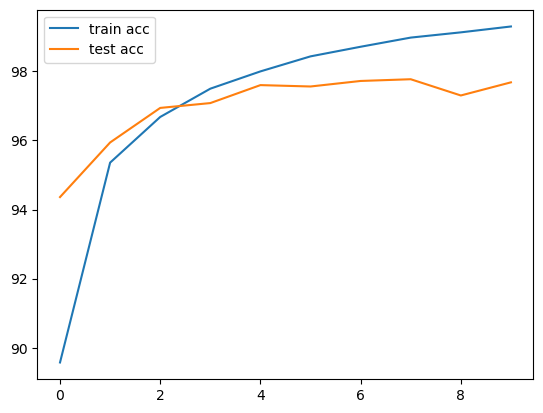

In [36]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='test acc')
plt.legend()

In [37]:
# New unseen data

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [38]:
with torch.no_grad():
    correct = 0

    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted==y_test).sum()

In [39]:
100 * correct.item()/len(test_data)

97.68

In [40]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 971,    0,    5,    0,    1,    2,    5,    2,    4,    2],
       [   0, 1121,    3,    0,    0,    0,    3,    6,    0,    2],
       [   0,    3, 1001,    2,    2,    0,    2,   10,    3,    0],
       [   2,    2,    7,  991,    0,   10,    1,    2,    4,    3],
       [   1,    0,    2,    0,  960,    2,    3,    3,    1,    6],
       [   0,    0,    0,    5,    0,  864,    3,    0,    2,    2],
       [   1,    2,    1,    0,    6,    4,  940,    0,    1,    0],
       [   1,    0,    3,    4,    1,    1,    0,  977,    2,    0],
       [   3,    7,   10,    2,    1,    7,    1,    4,  952,    3],
       [   1,    0,    0,    6,   11,    2,    0,   24,    5,  991]])